# Working with collections and object selections

- RDataFrame reads collections as the special type [ROOT::RVec](https://root.cern/doc/master/classROOT_1_1VecOps_1_1RVec.html) - e.g. a branch containing an array of floating point numbers can be read as a `ROOT::RVec<float>`.

- C-style arrays (with variable or static size), `std::vectors` and many other collection types can be read this way. 

- When reading ROOT data, column values of type `ROOT::RVec<T>` perform no copy of the underlying array.

- `RVec` is a container similar to `std::vector` (and can be used just like a `std::vector`) but it also offers a rich interface to operate on the array elements in a vectorised fashion, similarly to Python's NumPy arrays.

In [1]:
import ROOT

treename = "myDataset"
filename = "data/collections_dataset.root"
df = ROOT.RDataFrame(treename, filename)

print(f"Columns in the dataset: {df.GetColumnNames()}")

Welcome to JupyROOT 6.26/11
Columns in the dataset: { "E", "nPart", "px", "py" }


In [2]:
# import numpy
# numpy.version.version

To quickly inspect the data we can export it as a dictionary of `numpy` arrays thanks to the `AsNumpy` RDataFrame method. 

Note that for each row, `E` is an array of values:

In [3]:
# Instructor: use SWAN

npy_dict = df.AsNumpy(["E"])

for row, vec in enumerate(npy_dict["E"]):
    print(f"\nRow {row} contains:\n{vec}")

/cvmfs/cms.cern.ch/el8_amd64_gcc12/lcg/root/6.26.11-9631c813ba7e5cd5be390fa1ded44151/lib/ROOT/_pythonization/_rdataframe.py:138: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  tmp = numpy.empty(len(cpp_reference), dtype=numpy.object)


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### Define a new column with operations on RVecs

In [34]:
df1 = df.Define("good_pt", "sqrt(px*px + py*py)[E>100]")

`sqrt(px*px + py*py)[E>100]`:
- `px`, `py` and `E` are the columns, the elements of those columns are `RVec`s

- Operations on `RVec`s, such as sum, product, sqrt, preserve the dimensionality of the array

- `[E>100]` selects the elements of the array that satisfy the condition

- `E > 100`: boolean expressions on `RVec`s such as `E > 100` return a mask, that is an array with information which values pass the selection (e.g. `[0, 1, 0, 0]` if only the second element satisfies the condition)

In [50]:
# Try it!
# To-do: Edit the code below to compute good_pt for E>80
df_try = df.Define("good_pt", "sqrt(px*px + py*py)[E>1000]")

In [39]:
# Try it!
# To-do: Compare the number of events in these two RDataFrames with Count() and GetValue()
print(df1.Count().GetValue())
print(df_try.Count().GetValue())

3
3


In [41]:
df1.Display().Print()

+-----+------------+--------------+-------+---------------+----------------+
| Row | E          | good_pt      | nPart | px            | py             | 
+-----+------------+--------------+-------+---------------+----------------+
| 0   | 130000.01  | 0.0000000    | 40    | 0.0000000     | 0.0000000      | 
|     | 0.93827999 | 0.32323022   |       | 0.0000000     | 0.0000000      | 
|     | 0.93957090 | 1.2690683    |       | 0.0000000     | 0.0000000      | 
|     | 0.93957090 | 0.98391209   |       | 0.0000000     | 0.0000000      | 
|     | 0.93827999 | 0.25159067   |       | 0.0000000     | 0.0000000      | 
|     | 0.93957090 | 0.35965768   |       | 0.0000000     | 0.0000000      | 
|     | 0.93827999 | 0.53728041   |       | 0.0000000     | 0.0000000      | 
|     | 0.93957090 | 0.77752999   |       | 0.0000000     | 0.0000000      | 
|     | 0.93957090 | 0.51516854   |       | 0.0000000     | 0.0000000      | 
|     | 0.93827999 | 0.44018476   |       | 0.0000000     | 0.0000

### Now we can plot the newly defined column values in a histogram

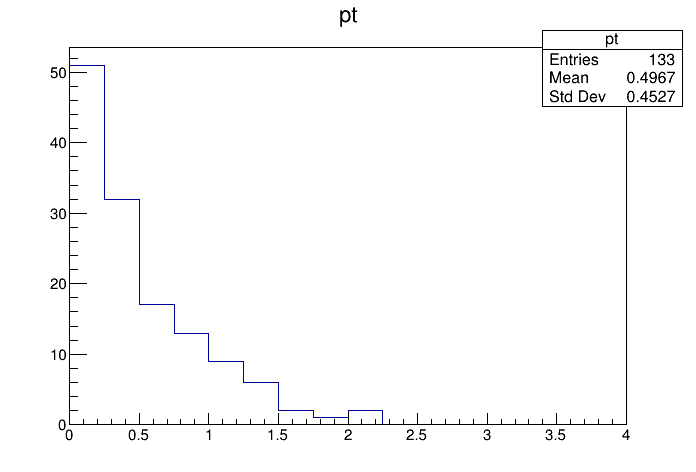

In [48]:
c = ROOT.TCanvas()
h = df1.Histo1D(("pt", "pt", 16, 0, 4), "good_pt")
h.Draw()
c.Draw()

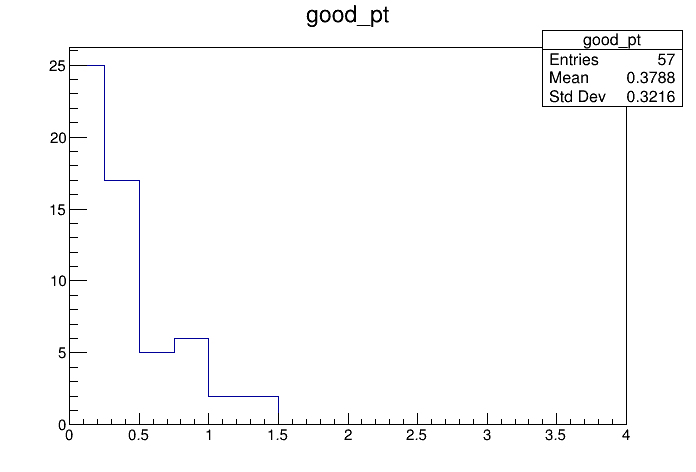

In [51]:
# Try it!
# To-do: Plot the "good_pt" column for df_try. Compare the number of entries.
c_try = ROOT.TCanvas()
h_try = df_try.Histo1D(("good_pt","good_pt", 16, 0, 4), "good_pt")

h_try.Draw()
c_try.Draw()